<h1>Weather Data AutoRegression Model</h1>

In [1]:
import numpy as np

import pandas as pd 
from pandas.plotting import lag_plot
from pandas import DataFrame
from pandas import concat
from pandas.plotting import autocorrelation_plot

import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from math import sqrt

In [2]:
df = pd.read_csv('climate-daily.csv', low_memory=False )
df.interpolate(method ='linear', limit_direction ='forward', inplace=True)

In [3]:
temp = df['MEAN_TEMPERATURE']
df.head()

,x,y,STATION_NAME,CLIMATE_IDENTIFIER,ID,LOCAL_DATE,PROVINCE_CODE,LOCAL_YEAR,LOCAL_MONTH,LOCAL_DAY,...,SPEED_MAX_GUST,SPEED_MAX_GUST_FLAG,COOLING_DEGREE_DAYS,COOLING_DEGREE_DAYS_FLAG,HEATING_DEGREE_DAYS,HEATING_DEGREE_DAYS_FLAG,MIN_REL_HUMIDITY,MIN_REL_HUMIDITY_FLAG,MAX_REL_HUMIDITY,MAX_REL_HUMIDITY_FLAG
0,-81.151111,43.033056,LONDON A,6144473,6144473.2012.3.20,2012-03-20 00:00:00,ON,2012,3,20,...,0.0,NaN,0.00,NaN,0.10,NaN,NaN,NaN,NaN,NaN
1,-81.151111,43.033056,LONDON A,6144473,6144473.2012.3.21,2012-03-21 00:00:00,ON,2012,3,21,...,50.0,NaN,0.90,NaN,0.00,NaN,NaN,NaN,NaN,NaN
2,-81.151111,43.033056,LONDON A,6144473,6144473.2012.3.22,2012-03-22 00:00:00,ON,2012,3,22,...,0.0,NaN,1.10,NaN,0.00,NaN,NaN,NaN,NaN,NaN
3,-81.151111,43.033056,LONDON A,6144473,6144473.2012.3.23,2012-03-23 00:00:00,ON,2012,3,23,...,61.0,NaN,0.55,M,4.25,M,NaN,NaN,NaN,NaN
4,-81.151111,43.033056,LONDON A,6144473,6144473.2012.3.24,2012-03-24 00:00:00,ON,2012,3,24,...,35.0,NaN,0.00,NaN,8.50,NaN,NaN,NaN,NaN,NaN


<h3>Plotting the temperature</h3>

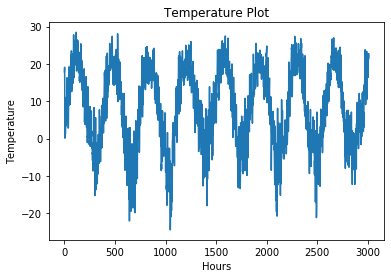

In [4]:
plt.plot(temp)
plt.title('Temperature Plot')
plt.xlabel('Hours')
plt.ylabel('Temperature')
plt.show()

<h3>Checking for autocorrelation using a lag plot</h3>

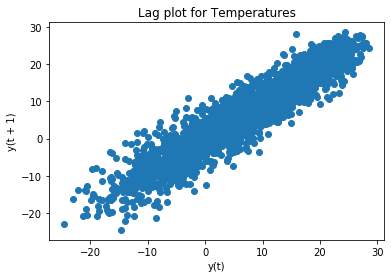

In [5]:
lag_plot(temp)
plt.title('Lag plot for Temperatures')
plt.show()

<h3>Creating a lagged version of the dataset and calculating a correlation matrix of each column with other columns, including itself.</h3>

In [6]:
series = df['MEAN_TEMPERATURE']
X = series.values
values = DataFrame(X)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result) #result shows strong correlation

          t-1       t+1
t-1  1.000000  0.945487
t+1  0.945487  1.000000


<h3>Plotting the correlation coefficient for each lag variable. Showing the swing in positive and negative correlation as the temperature values change across different seasons each year</h3>



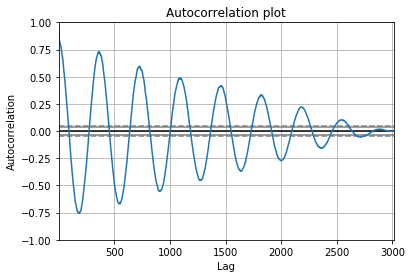

In [7]:
autocorrelation_plot(series)
plt.title('Autocorrelation plot')
plt.show()

<h3>Plotting the correlation as a line plot for one month</h3>

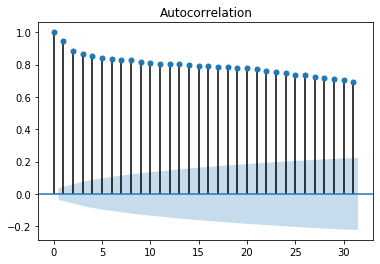

In [8]:
plot_acf(series, lags=31)
plt.show()

<h3>Training the model</h3>

In [9]:
testsize = df.shape[0]*.2
testsize = round(testsize)

train, test = X[1:len(X)-testsize], X[len(X)-testsize:]
# train autoregression
print(train.size)
print(test.size)

2408
602


In [10]:
window = 29
model = AutoReg(train, lags=29)
model_fit = model.fit()
coef = model_fit.params
print('The coefficients for the model are: ')
print(coef)

The coefficients for the model are: 
[ 1.68578029e-01  9.71555398e-01 -3.86782600e-01  2.41042308e-01
 -1.96623311e-02 -1.98023881e-02  6.05757283e-02  2.40089892e-02
  1.34159970e-02  1.06320469e-02 -1.26812761e-02  2.57434767e-02
 -2.45385827e-02  1.00043458e-01 -6.19121419e-02  4.05355925e-02
 -2.72792557e-03  2.19020854e-02 -1.75688913e-03 -1.44577161e-02
  8.48802723e-02 -3.03438081e-02 -7.53866128e-05  2.23839262e-02
 -4.00844911e-02  6.99528189e-03  1.93690247e-02 -4.20174458e-02
  3.76732555e-02 -4.37637100e-02]


In [11]:
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted: ',yhat,  'expected: ', obs)
        

predicted:  3.75592119573743 expected:  2.6
predicted:  3.30579902724135 expected:  -0.4
predicted:  -0.1011769362118419 expected:  -2.3
predicted:  -0.23471507279727455 expected:  -0.1
predicted:  1.7044793713127806 expected:  2.3
predicted:  2.8684114600578505 expected:  -2.3
predicted:  -1.933857180303348 expected:  -3.0
predicted:  -0.8620233384925297 expected:  -2.5
predicted:  -1.6204559147040563 expected:  0.4
predicted:  1.2467985511475017 expected:  -0.4
predicted:  -0.28966611847911183 expected:  -1.7
predicted:  -0.5987995682973078 expected:  -1.4
predicted:  -0.2522091572638795 expected:  -3.1
predicted:  -2.695727991772254 expected:  -5.2
predicted:  -3.850399113006055 expected:  -9.4
predicted:  -7.605008239802532 expected:  -1.5
predicted:  0.8600089052942137 expected:  4.0
predicted:  2.970106780636786 expected:  4.2
predicted:  2.382684108645464 expected:  2.3
predicted:  1.336086100161574 expected:  -1.3
predicted:  -1.8064286009412196 expected:  -2.0
predicted:  -1.6

predicted:  9.732562908977412 expected:  12.5
predicted:  11.230823090920607 expected:  4.5
predicted:  2.8206176735094095 expected:  4.9
predicted:  6.836907467478432 expected:  7.2
predicted:  7.057570900734007 expected:  7.0
predicted:  6.609961310338064 expected:  1.9
predicted:  2.743112703149768 expected:  2.0
predicted:  4.195061896802773 expected:  7.1
predicted:  8.138864930882361 expected:  2.9
predicted:  1.7170380513266323 expected:  4.1
predicted:  6.013082175806633 expected:  4.8
predicted:  5.613336598991326 expected:  9.3
predicted:  9.56957654145525 expected:  14.0
predicted:  13.157308441451466 expected:  13.3
predicted:  10.722980889815249 expected:  12.0
predicted:  11.33911176319062 expected:  11.8
predicted:  11.313888232016012 expected:  14.5
predicted:  13.619927569467057 expected:  14.1
predicted:  12.22517514707062 expected:  14.8
predicted:  14.02307108447535 expected:  16.9
predicted:  16.167315184925428 expected:  19.2
predicted:  16.27356321902425 expected

In [12]:
rmsd = np.sqrt(mean_squared_error(test, predictions))      
r2_value = r2_score(test, predictions)                     


print("Root Mean Square Error \n", rmsd) #the lower the value the better the fit
print("R^2 Value: \n", r2_value) #the closer to 1 the better the fit

Root Mean Square Error 
 3.1786220448273967
R^2 Value: 
 0.8984237205156513


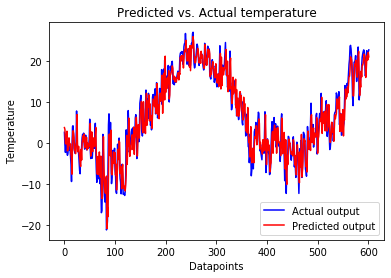

In [13]:
plt.plot(test, color='blue', label='Actual output')
plt.plot(predictions, color='red', label='Predicted output')
plt.legend()
plt.title('Predicted vs. Actual temperature')
plt.xlabel('Datapoints')
plt.ylabel('Temperature')
plt.show()

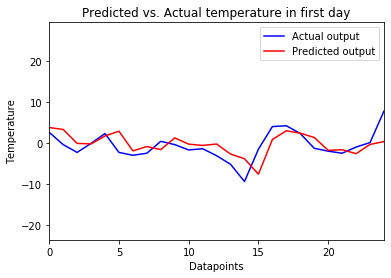

In [14]:
plt.plot(test, color='blue', label='Actual output')
plt.plot(predictions, color='red', label='Predicted output')
plt.legend()
plt.title('Predicted vs. Actual temperature in first day')
plt.xlabel('Datapoints')
plt.ylabel('Temperature')
plt.xlim(0,24)
plt.show()